In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
"""
0) prepare data
1) model
2) loss and optimizer
3) training loop
"""

'\n0) prepare data\n1) model\n2) loss and optimizer\n3) training loop\n'

In [13]:
import torch.optim.sgd


X_numpy, Y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1
)
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0], 1)  # reshape the Y
n_samples, n_features = X.shape

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, Y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss =  {loss.item():.4f}")

epoch: 10, loss =  332.5676
epoch: 20, loss =  332.5676
epoch: 30, loss =  332.5676
epoch: 40, loss =  332.5676
epoch: 50, loss =  332.5676
epoch: 60, loss =  332.5676
epoch: 70, loss =  332.5676
epoch: 80, loss =  332.5676
epoch: 90, loss =  332.5676
epoch: 100, loss =  332.5676


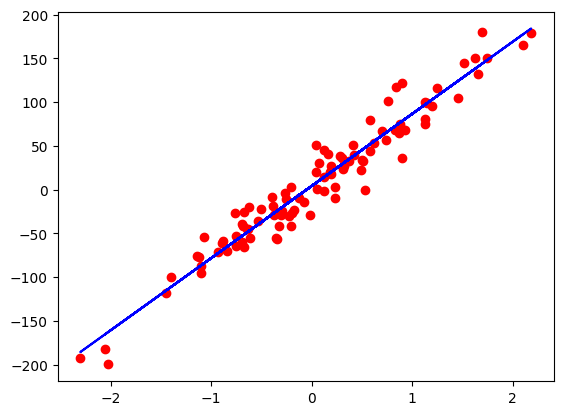

In [17]:
# plot
predicted = model(X).detach().numpy()  # no more require_gradient
plt.plot(X_numpy, Y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()